In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
def depth_estimation(imgL,imgR,x_left,x_right,y_top,y_bottom):
    """
    Estimates relative distance of a given object
    Parameters:
    -----------
    imgL: image captured by left camera

    imgR: image capyured by right camera

    x_left,x_right,y_top,y_bottom: object co-ordinate
    """
    
    im_width=640

    # Computing disparity
    stereo = cv2.StereoSGBM_create(numDisparities=320	, blockSize=11)
    disparity = stereo.compute(imgL,imgR)
    

    # Calulating depth map from disparity map
    nDisparity = np.array(disparity)+17
    nDisparity = 29184/(nDisparity*2)
    x_left = max(0,x_left-(x_right-x_left))
    x_right = min(im_width,x_right+(x_right-x_left))
    return np.amin(nDisparity[y_top:y_bottom,x_left:x_right])

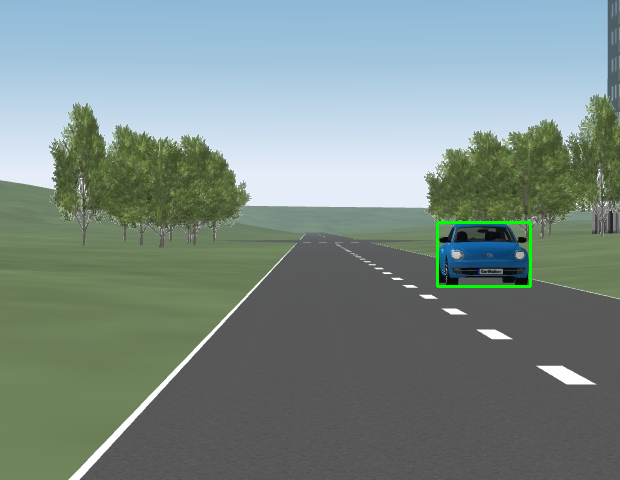

In [33]:
# show object
img = cv2.imread("camera111.jpg")
cv2_imshow(cv2.rectangle(img,(437, 286),(530, 222),(0,255,0),2))

In [34]:
# estimate depth
depth_estimation(plt.imread("camera111.jpg"),plt.imread("camera222.jpg"),437, 530, 222, 286)

2.849443468072642